# Choosing a real world phenomenon and dataset

As I work in an insurance company and I am part of a team supporting a global claims administration operation I will pick a dataset that would be consistent with my work environment.
Claims administration have a rich and deep dataset,with numerous interactions with customers and different channels of communication.

When someone buys an insurance policy key information is provided by the customer and when somone makes a claim on their insurance policy further information is provided by the claimant/customer.At first glance there are two potential phenomenons:
 1. A customer making a claim provides numerous datapoints,for example policy start date,incident date,claim date,claim amount.All this information enables companies to calculate key financial and actuarial measures,for example claim reserves,headcount requirements,profitability,claim frequency.
 2. Claims service being measured....customer experiance (eg.Net Promotor Score) and operational Key Performance Indicators(eg. response times,customer effort)

The type of insurance that I will base my analysis on will be payment protection insurance.Payment protection insurance (PPI) is insurance that will pay out a sum of money to help you cover your monthly repayments on mortgages, loans, credit/store cards or catalogue payments if you are unable to work. This may be as a result of illness, accident, death or unemployment and will be covered on your policy [1].



# Investigation of the types of variables, distributions and relationships

# Simulation of the dataset

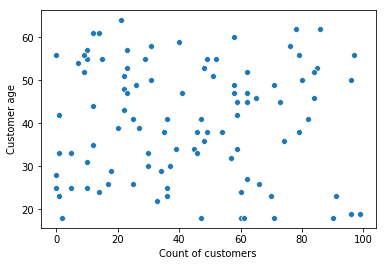

In [6]:
# Display the spread of customer ages,note that insurance is sold to customers between 18 and 65 years of age
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
 
cust = np.random.choice(101, 100) # generates an array of 100 numbers between 1 and 100
cust_age = np.random.randint(18, 65, 100) # randomly assigns ages between 18 and 65 years of age
sns.scatterplot(cust,cust_age)
plt.xlabel("Count of customers")
plt.ylabel("Customer age")
plt.show()

Categorical variable- occupation

# References:

[1] CPCC https://www.ccpc.ie/consumers/money/insurance/payment-protection-insurance/

